In [1]:
# notebook configuration
%matplotlib inline

import os 
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from IPython.display import Image

# define general parameters for plots
plt.rcParams["figure.figsize"] = (12.0, 8.0)

In [2]:
#Experimental data
case1_final_velocity = 2.179 #m/s
case2_final_velocity = 3.28 #m/s
case3_final_velocity = 4.358 #m/s

case1_exp = 686.199656 #Pa
case2_exp = 645.039874 #Pa
case3_exp = 500.417202 #Pa

exp_minimum_fluid_velocity = 1.05 #m/s

In [3]:
# Case 1 - No distributor - 

# loading the simulation data
simulation_data = open("NETL-no-distributor-mass-inlet-case1-pressure_point1.out", 'r')
case1_time_point1, case1_pressure_point1 = np.loadtxt(simulation_data, delimiter = ' ', skiprows = 2, unpack = True)
simulation_data.close()

simulation_data = open("NETL-no-distributor-mass-inlet-case1-pressure_point2.out", 'r')
case1_time_point2, case1_pressure_point2 = np.loadtxt(simulation_data, delimiter = ' ', skiprows = 2, unpack = True)
simulation_data.close()

simulation_data = open("NETL-no-distributor-mass-inlet-case1-velocity-inlet.out", 'r')
case1_time_point1, case1_velocity = np.loadtxt(simulation_data, delimiter = ' ', skiprows = 2, unpack = True)
simulation_data.close()


# Case 2 - No distributor - 

# loading the simulation data
simulation_data = open("NETL-no-distributor-vel-inlet-case2-pressure_point1.out", 'r')
case2_time_point1, case2_pressure_point1 = np.loadtxt(simulation_data, delimiter = ' ', skiprows = 2, unpack = True)
simulation_data.close()

simulation_data = open("NETL-no-distributor-vel-inlet-case2-pressure_point2.out", 'r')
case2_time_point2, case2_pressure_point2 = np.loadtxt(simulation_data, delimiter = ' ', skiprows = 2, unpack = True)
simulation_data.close()

simulation_data = open("NETL-no-distributor-vel-inlet-case2-velocity-inlet.out", 'r')
case2_time_point1, case2_velocity = np.loadtxt(simulation_data, delimiter = ' ', skiprows = 2, unpack = True)
simulation_data.close()

# Case 3 - No distributor - 

# loading the simulation data

simulation_data = open("NETL-no-distributor-vel-inlet-case3-pressure_point1.out", 'r')
case3_time_point1, case3_pressure_point1 = np.loadtxt(simulation_data, delimiter = ' ', skiprows = 2, unpack = True)
simulation_data.close()

simulation_data = open("NETL-no-distributor-vel-inlet-case3-pressure_point2.out", 'r')
case3_time_point2, case3_pressure_point2 = np.loadtxt(simulation_data, delimiter = ' ', skiprows = 2, unpack = True)
simulation_data.close()

simulation_data = open("NETL-no-distributor-vel-inlet-case3-velocity-inlet.out", 'r')
case3_time_point1, case3_velocity = np.loadtxt(simulation_data, delimiter = ' ', skiprows = 2, unpack = True)
simulation_data.close()

In [4]:
case1_pressure_drop = case1_pressure_point1 - case1_pressure_point2
case2_pressure_drop = case2_pressure_point1 - case2_pressure_point2
case3_pressure_drop = case3_pressure_point1 - case3_pressure_point2


case1_exp_pressure_drop  = np.full(case1_pressure_drop.shape, case1_exp)
case2_exp_pressure_drop  = np.full(case2_pressure_drop.shape, case2_exp)
case3_exp_pressure_drop  = np.full(case3_pressure_drop.shape, case3_exp)
case1_t_min_fluid_velocity = case1_time_point1[np.argmax(case1_velocity>exp_minimum_fluid_velocity)]
case2_t_min_fluid_velocity = case2_time_point1[np.argmax(case2_velocity>exp_minimum_fluid_velocity)]
case3_t_min_fluid_velocity = case3_time_point1[np.argmax(case3_velocity>exp_minimum_fluid_velocity)]

print(case1_t_min_fluid_velocity, case2_t_min_fluid_velocity, case3_t_min_fluid_velocity)

0.964705118952 0.642803514493 0.482852406688


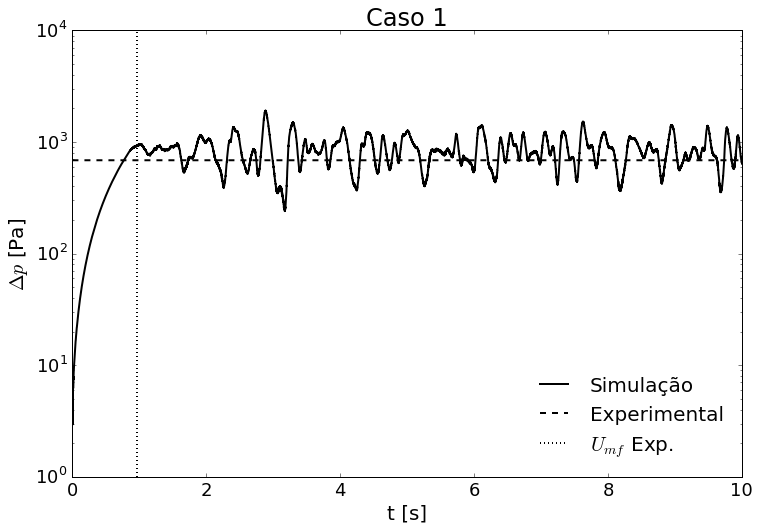

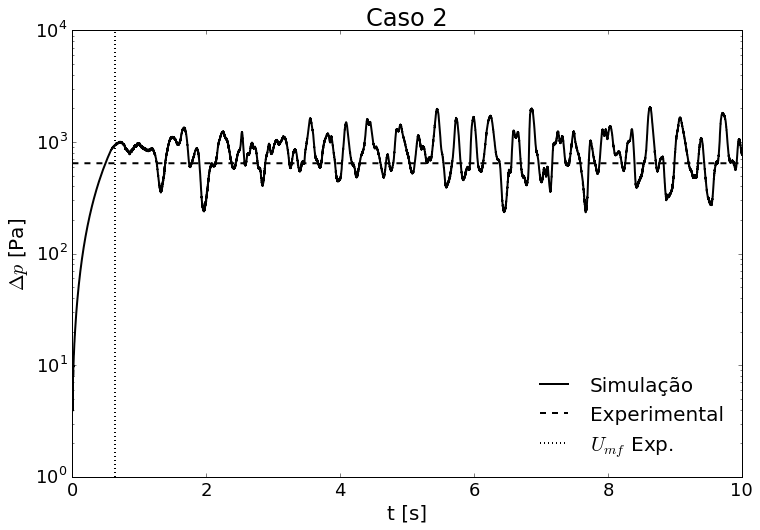

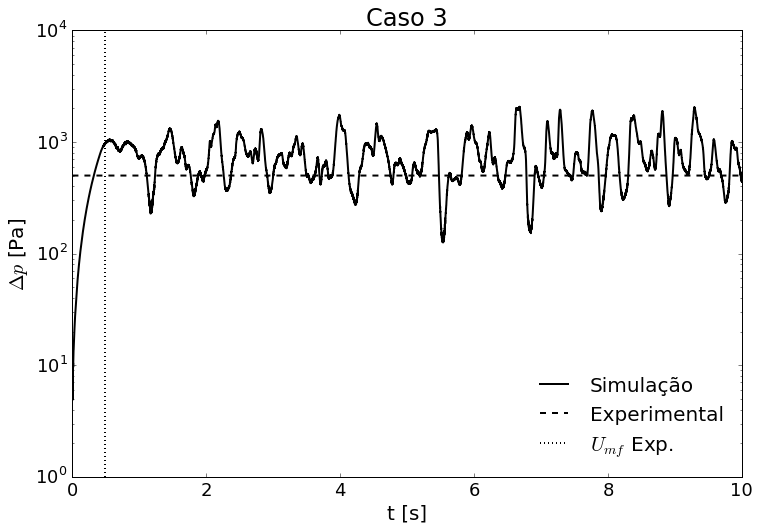

In [5]:
#Plotting

#pressure drop

#Case 1 

plt.semilogy(case1_time_point1, case1_pressure_drop, linestyle = "-", linewidth = 2, color = "black", label = u"Simulação")
plt.semilogy(case1_time_point1, case1_exp_pressure_drop, color = "black",  linestyle = "--", linewidth = 2, label = u"Experimental")
plt.axvline(case1_t_min_fluid_velocity,  color = "black",  linestyle = ":", linewidth = 2, label = u"$U_{mf}$ Exp.")
plt.title("Caso 1", fontsize = 24)
plt.xlabel("t [s]", fontsize = 20)
plt.ylabel("$\\Delta p$ [Pa]", fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.legend(fontsize = 20, frameon = False, loc = 4)
plt.xlim(0, 10)     
plt.ylim(1e0, 1e4)  
plt.savefig('Case1_pressure_drop.png')
plt.show()

#Case 2 

plt.semilogy(case2_time_point1, case2_pressure_drop, linestyle = "-", linewidth = 2, color = "black", label = u"Simulação")
plt.semilogy(case2_time_point1, case2_exp_pressure_drop, color = "black",  linestyle = "--", linewidth = 2, label = u"Experimental")
plt.axvline(case2_t_min_fluid_velocity,  color = "black",  linestyle = ":", linewidth = 2, label = u"$U_{mf}$ Exp.")
plt.title("Caso 2", fontsize = 24)
plt.xlabel("t [s]", fontsize = 20)
plt.ylabel("$\\Delta p$ [Pa]", fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.legend(fontsize = 20, frameon = False, loc = 4)
plt.xlim(0, 10)     
plt.ylim(1e0, 1e4)  
plt.savefig('Case2_pressure_drop.png')
plt.show()


#Case 3 

plt.semilogy(case3_time_point1, case3_pressure_drop, linestyle = "-", linewidth = 2, color = "black", label = u"Simulação")
plt.semilogy(case3_time_point1, case3_exp_pressure_drop, color = "black",  linestyle = "--", linewidth = 2, label = u"Experimental")
plt.axvline(case3_t_min_fluid_velocity,  color = "black",  linestyle = ":", linewidth = 2, label = u"$U_{mf}$ Exp.")
plt.title("Caso 3", fontsize = 24)
plt.xlabel("t [s]", fontsize = 20)
plt.ylabel("$\\Delta p$ [Pa]", fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.legend(fontsize = 20, frameon = False, loc = 4)
plt.xlim(0, 10)     
plt.ylim(1e0, 1e4)  
plt.savefig('Case3_pressure_drop.png')
plt.show()

In [6]:
#calculating mean pressure drop

limited_time_case1 = case1_time_point1[np.argmax(case1_velocity>case1_final_velocity):]
limited_pressure_case1 = case1_pressure_drop[np.argmax(case1_velocity>case1_final_velocity):]
print(limited_time_case1,limited_pressure_case1 )

limited_time_case2 = case1_time_point2[np.argmax(case2_velocity>case2_final_velocity):]
limited_pressure_case2 = case2_pressure_drop[np.argmax(case2_velocity>case2_final_velocity):]

limited_time_case3 = case3_time_point1[np.argmax(case3_velocity>case3_final_velocity):]
limited_pressure_case3 = case3_pressure_drop[np.argmax(case3_velocity>case3_final_velocity):]

case1_mean_pressure_drop=np.mean(limited_pressure_case1)
case2_mean_pressure_drop=np.mean(limited_pressure_case2)
case3_mean_pressure_drop=np.mean(limited_pressure_case3)

print(case1_mean_pressure_drop, case3_mean_pressure_drop)

error_case1 = (case1_exp-case1_mean_pressure_drop)/case1_mean_pressure_drop
error_case2 = (case2_exp-case2_mean_pressure_drop)/case2_mean_pressure_drop
error_case3 = (case3_exp-case3_mean_pressure_drop)/case3_mean_pressure_drop



[  2.00038854   2.00138824   2.00238793 ...,   9.99894363   9.99994332
  10.00094302] [ 1010.59765244  1007.37940264  1008.31219554 ...,   644.77416897
   648.27255249   640.70466089]
844.922277679 779.307627398


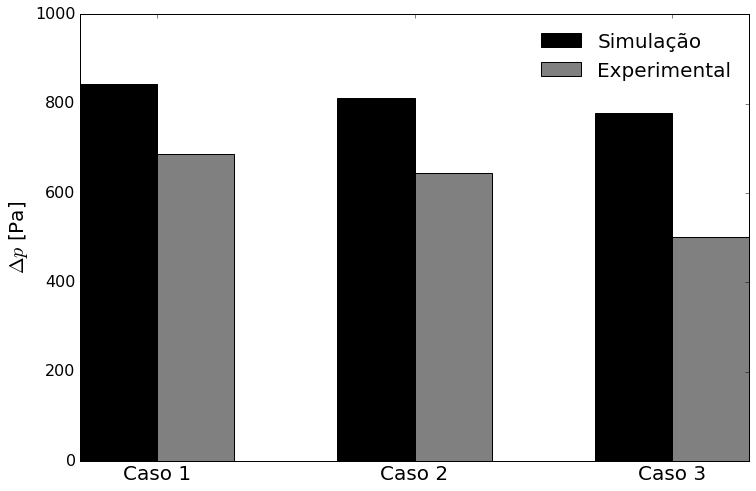

In [7]:
#histrogram plotting

mean_pressure_drop = [case1_mean_pressure_drop, case2_mean_pressure_drop, case3_mean_pressure_drop]
exp_pressure_drop = [ case1_exp, case2_exp, case3_exp]
width = 0.3
index1 = [1, 2, 3]
index2 = [1+width, 2+width, 3+width]
plt.bar( index1, mean_pressure_drop, width = width, color = "black", label="Simulação")
plt.bar( index2, exp_pressure_drop, width = width, color = "grey",  label="Experimental")
plt.ylabel('$\\Delta p$ [Pa]', fontsize = 20)
plt.xticks(index2, ('Caso 1', 'Caso 2', 'Caso 3'), fontsize = 20)
plt.yticks(fontsize = 16)
plt.xlim(index1[0], index2[-1]+width)   
plt.ylim(0, 1000) 
plt.legend(fontsize = 20, frameon = False, loc = 0)
plt.savefig('mean_pressure_drop_comparison.png')
plt.show()
#plt.hist(bins, exp_pressure_drop,  normed = 1, facecolor = 'b')